Analysis of eviction data:


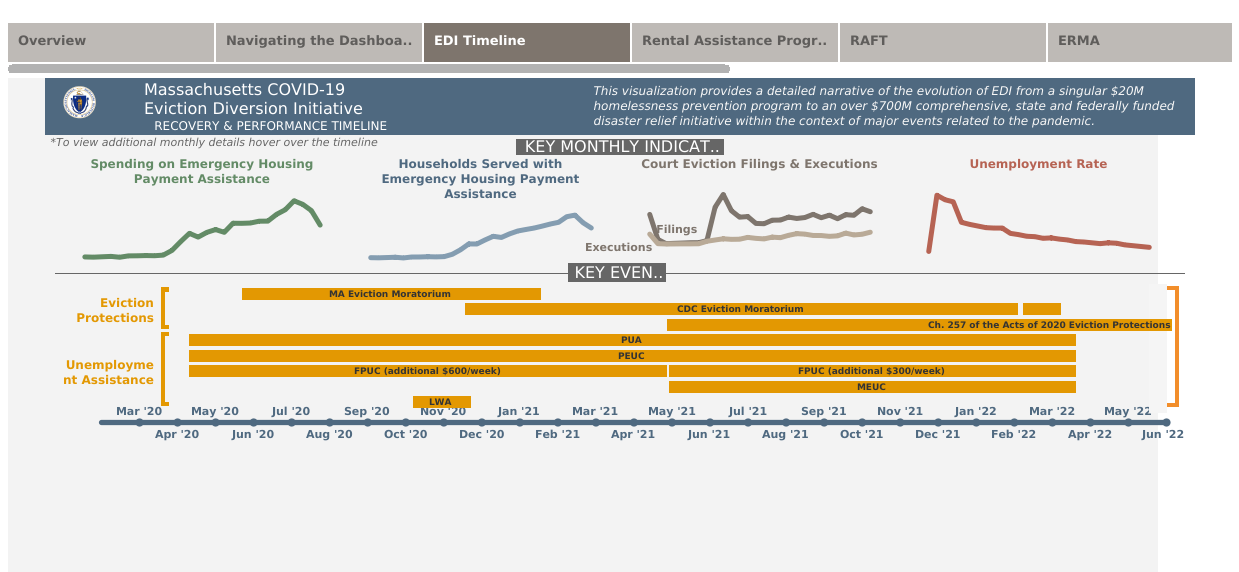

In [ ]:
from IPython.display import Image
Image(filename='EDI_Dashboard.png') 


Also, according to the report about eviction fillings we find on MassLandlords, Inc. Available online at https://masslandlords.net/policy/eviction-data/.

we find that during the whole 2021:
Most common cause of an eviction filling is Non-payment
Least stable municipality/neighborhood is West Hyannisport
Least stable with 10+ filings is East Falmouth
Least stable with 100+ filings is Fall River
Least stable county is Bristol


also during the whole 2022.
Most common cause of an eviction filling is Non-payment
Least stable municipality/neighborhood is Florence
Least stable with 10+ filings is Florence
Least stable with 100+ filings is  Fall River
Least stable county is Plymouth


and during the first month in 2023:
Most common cause of an eviction filling is Non-payment
Least stable municipality/neighborhood is Oxford
Least stable with 10+ filing is Oxford
Least stable with 100+ filings is New Bedford
Least stable county is Plymouth

Since the most common cause of eviction is Non-payment,
we pay further attention to the detail data of this cause.
this is the picture we find on https://public.tableau.com/app/profile/drap4687/viz/MassachusettsTrialCourtSummaryProcessExecutionsIssued/ExecutionsIssd_byWeekMonth


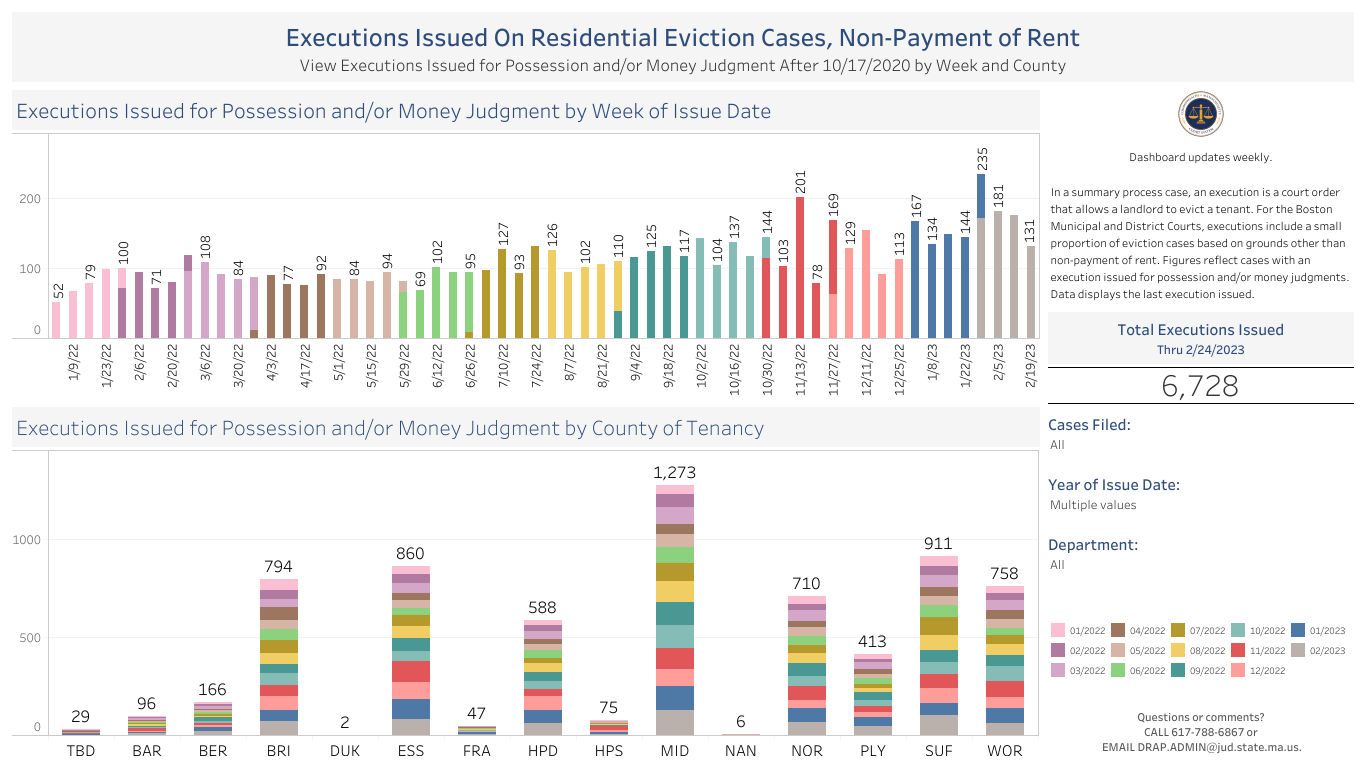

In [ ]:
Image(filename='Executions Issd. by Week_Month.png') 

we can see from the picture above that the highest judgements issued happend around the start of the year when weather tend to be cold.
And the most evictinon happend is Middlesex county which is different from the data we get from the MassLandlords.

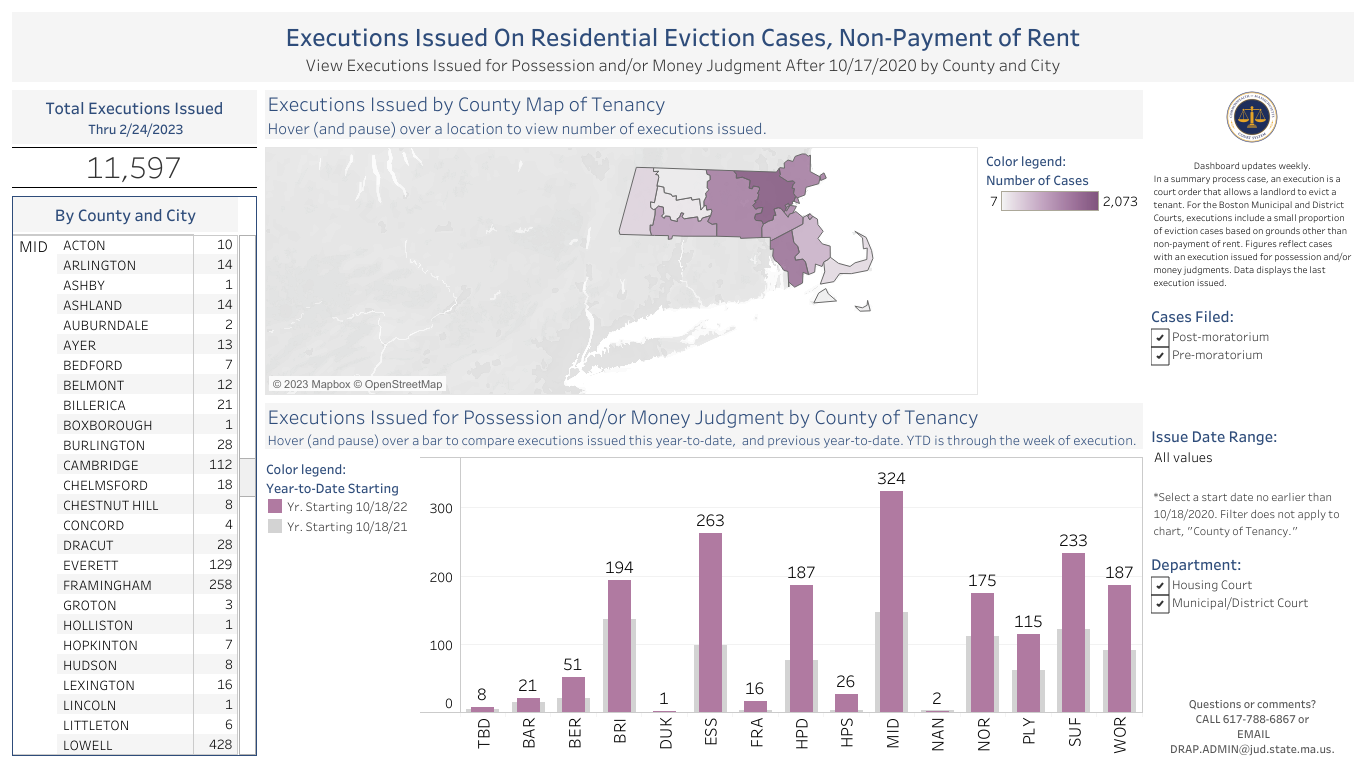

In [ ]:
Image(filename='Executions Issd. by Locations.png') 

Also we can see the detail executions issued in city, we can find that the Boston's county SUF has 233 executions and Boston has 216.
And we get the detail data of boston's eviction on https://evictionlab.org/eviction-tracking/boston-ma/

In [ ]:
import pandas as pd
df=pd.read_csv('eviction_boston_monthly_2020_2021.csv')
df['year']=[row['month'][-4:] for index,row in df.iterrows()]
print(df.groupby('GEOID').sum(numeric_only=True)['filings_avg'].nlargest(3))

GEOID
25025082100    655.75
25025130406    580.50
25025100500    420.00
Name: filings_avg, dtype: float64


by refering to the map we find that the top3 are 
821, Suffolk County, 
1304.06, Suffolk County
1005, Suffolk County
Also we find report of boston's Commercial Eviction Filingsduring covid-19  https://public.tableau.com/app/profile/pete.stein1573/viz/EvictionFilingsCharts/Dashboard1

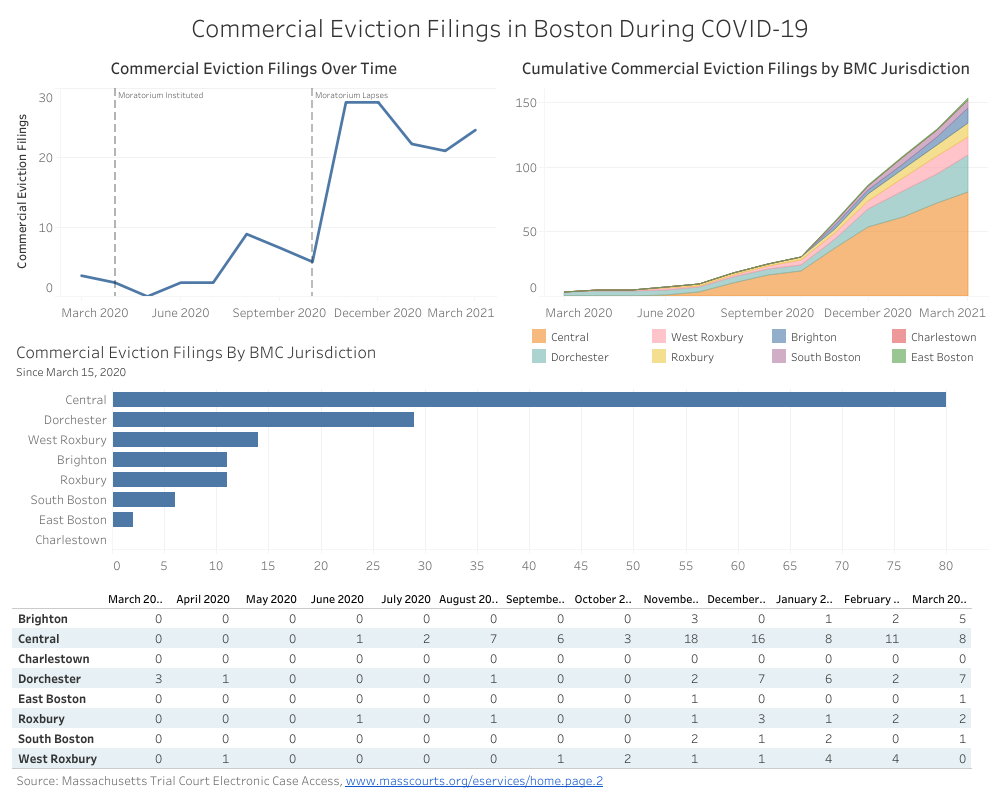

In [ ]:
Image(filename='Dashboard 1.png') 

Here are the analysis of the count data:
we find data https://www.mass.gov/lists/land-court-masscourts-reports  (The Land Court Reports are 3 reports that list each new Land Court case filed during a 3 month period for Servicemembers, Tax Lien, and Miscellaneous Land Court case types. Each list entry shows the case number, filed date, city, street, and party names for each new case.)
we using https://www.zamzar.com/convert/pdf-to-csv/ to convert the downloaded pdf file to csv file

In [ ]:
#process the converted csv file
def formatcsv(path):
    df=pd.read_csv(path)
    df=df.dropna()
    to_drop=[index  for index,row in df.iterrows() if row['Case Number']=='Case Number' or row['City']!='Boston']
    df=df.drop(to_drop)
    df['Street']=[row['Street'].split(" ",2)[1]  for index,row in df.iterrows()]
    df.to_csv(path,index=False)

    
formatcsv('CasesbyFileDateMiscellaneous.csv')
formatcsv('CasesbyFileDateServiceMembers.csv')
formatcsv('CasesbyFileDateTaxLien.csv')

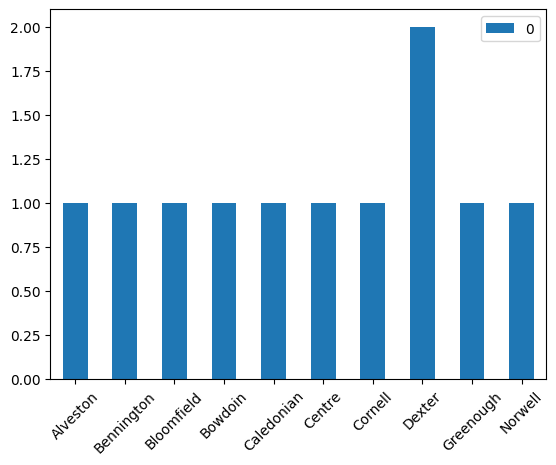

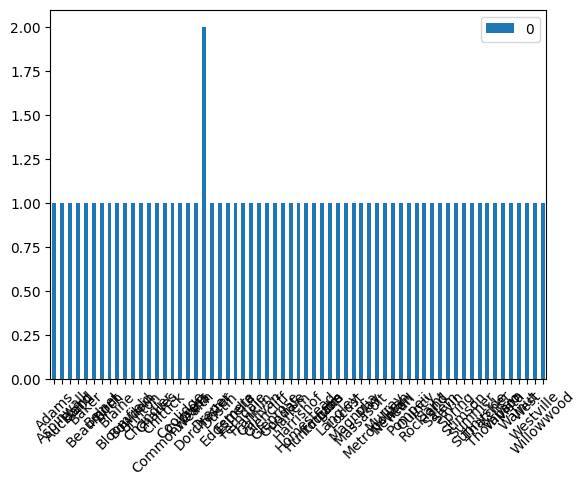

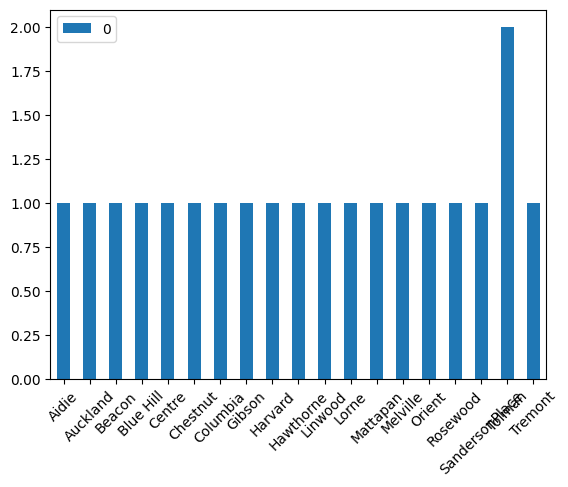

In [ ]:
def csv_plot(path):
    df=pd.read_csv(path)
    d=df.groupby('Street').groups
    chart_df=pd.DataFrame([len(v.values.tolist()) for v in d.values()],index=d.keys())
    chart_df.plot.bar(rot=45)

csv_plot('CasesbyFileDateMiscellaneous.csv')
csv_plot('CasesbyFileDateServiceMembers.csv')
csv_plot('CasesbyFileDateTaxLien.csv')